<div style="border: solid blue 2px; padding: 15px; margin: 10px">
<b>Overall Summary of the Project – Iteration 1</b>

Hi Alex, excellent work! You've successfully completed all key sections of the project and demonstrated a strong grasp of data analysis techniques. Your code is well-structured, your visualizations are clear, and your conclusions are insightful.

---

<b>Nice work on:</b>  
✔️ Choosing a relevant time period and supporting your choice with data  
✔️ Analyzing platform trends with growth rates and total sales comparisons  
✔️ Using a variety of plots (line, bar, box, pie) to highlight different aspects of the data  
✔️ Performing statistical hypothesis tests with correct logic and interpretation  
✔️ Writing a general conclusion that effectively summarizes your findings

<hr>

Everything is in place and well-executed — the project is now approved. ✅  
Keep up the great work!

<hr>

Just a quick reminder:  
🟢 Green comments highlight great solutions worth keeping.  
🟡 Yellow comments are suggestions for optimization.  
🔴 Red comments must be fixed for a project to be approved.  
🔵 You can use blue to leave your own comments or questions if needed.

<hr>

Best,  
**Victor Camargo (Discord: camargo.victor)**  
Feel free to reach out in the DS channel (ds-questions) if you need further help!

P.S. Don’t forget to rate your experience by leaving feedback here:  
<a href="https://form.typeform.com/to/CFM84XIJ">https://form.typeform.com/to/CFM84XIJ</a>
</div>


# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great job clearly presenting the project overview goal. The purpose of the analysis is well stated and aligns perfectly with the business case.
</div>

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns


## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
print(games.info())
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

In [4]:
# Check for duplicate entries
print(games.duplicated().sum())

0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent start. You have properly loaded the dataset, explored its structure, and verified for duplicates. Great attention to data types and null values early on.  
  Also, it's great that you are framing the analysis with clear key questions. This helps guide your exploration and keeps the focus on actionable insights.
</div>

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [6]:
# Verify the changes
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [7]:
# Check current data types
print(games.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [8]:

# Make changes to data types if necessary
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'])
games['critic_score'] = games['critic_score'].astype('Int64')
games['rating'] = games['rating'].astype('category')
# Describe the columns where the data types have been changed and why.

Year of release needed to be an integer instead of a float
user scores tbd is replaced with NaN values for easier processing and changed from object to integer.
critic score is chenged from float to int for easier processing
rating changed to category for efficiency

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great job standardizing the column names and thoughtfully converting data types. You handled 'tbd' values properly, used appropriate conversions, and explained your reasoning clearly.
</div>

# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
leave blank because we cannot guess the inputs

### 2.3 Handling Missing Values

In [9]:
# Examine missing values
print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [10]:
# Calculate percentage of missing values
missing_percent = games.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

user_score         54.591684
critic_score       51.319174
rating             40.478612
year_of_release     1.609333
name                0.011965
genre               0.011965
dtype: float64


In [11]:
# Analyze patterns in missing values

missing_summary = games.isnull().sum()
missing_percent = (games.isnull().sum() / len(games)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percent': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

                 Missing_Count  Missing_Percent
name                         2         0.011965
year_of_release            269         1.609333
genre                        2         0.011965
critic_score              8578        51.319174
user_score                9125        54.591684
rating                    6766        40.478612


In [12]:

# Handle missing values based on analysis
games['rating'] = games['rating'].cat.add_categories(['Unknown'])
games['rating'] = games['rating'].fillna('Unknown')
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

print(games.isnull().sum())
# Your code here to handle missing values according to your strategy


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


# Why do you think the values are missing? Give possible reasons.
Missing values in year_of_release could be games without a release year.
Missing user_score could be due to no user ratings yet or delayed rating.
Missing critic_score means no critic reviews available.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

I left them blank because we cannot infer nor guess what the input may have been.

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great work identifying and analyzing missing values. Your explanation of the causes and justification for leaving certain values blank is thoughtful and well aligned with best practices. The handling of 'tbd' entries and the addition of 'Unknown' for missing ratings is also a smart, transparent choice.
</div>


### 2.4 Calculate Total Sales

In [13]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great work completing Step 2. You cleaned the data thoroughly, addressed missing values with care, and calculated total sales correctly. This sets a solid foundation for the rest of the analysis.
</div>

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [14]:
# Create a DataFrame with game releases by year
games_by_year = games['year_of_release'].value_counts().sort_index()

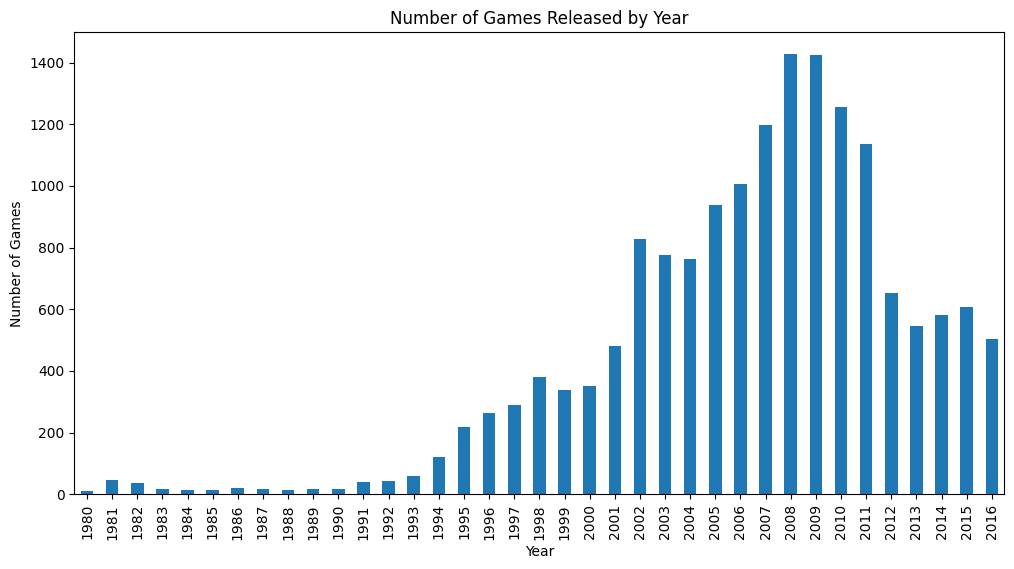

In [15]:
# Visualize the distribution of games across years

plt.figure(figsize=(12,6))
games_by_year.plot(kind='bar')
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

In [16]:
# Display summary statistics for each year

yearly_stats = games.groupby('year_of_release')['total_sales'].agg(['count', 'mean', 'median', 'std']).sort_index()
print(yearly_stats)

                 count      mean  median        std
year_of_release                                    
1980                 9  1.264444   0.770   1.383547
1981                46  0.775652   0.465   0.783019
1982                36  0.802222   0.540   1.257910
1983                17  0.988235   0.770   0.838825
1984                14  3.596429   1.485   7.200795
1985                14  3.853571   1.015  10.510376
1986                21  1.765714   1.360   1.328001
1987                16  1.356250   0.885   1.225174
1988                15  3.147333   1.510   4.414414
1989                17  4.320588   1.610   7.895161
1990                16  3.085625   1.520   4.827705
1991                41  0.786098   0.380   1.008699
1992                43  1.771163   0.790   2.469928
1993                60  0.766500   0.355   1.440388
1994               121  0.654793   0.270   1.184502
1995               219  0.402374   0.140   0.760314
1996               263  0.757224   0.210   2.304625
1997        

### Questions to Consider:
- Which years show significant numbers of game releases? 2008, 2009

- Are there any notable trends or patterns in the number of releases? 
- Is there enough recent data to make predictions for 2017?


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent visualization and analysis of game release trends. The bar plot is clear and informative, and the supporting summary statistics help interpret the data. Great job also connecting this step to the questions about trends and forecasting.
</div>


## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [17]:
# Calculate total sales by platform and year
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<AxesSubplot:title={'center':'Total Sales by Platform'}, xlabel='platform'>

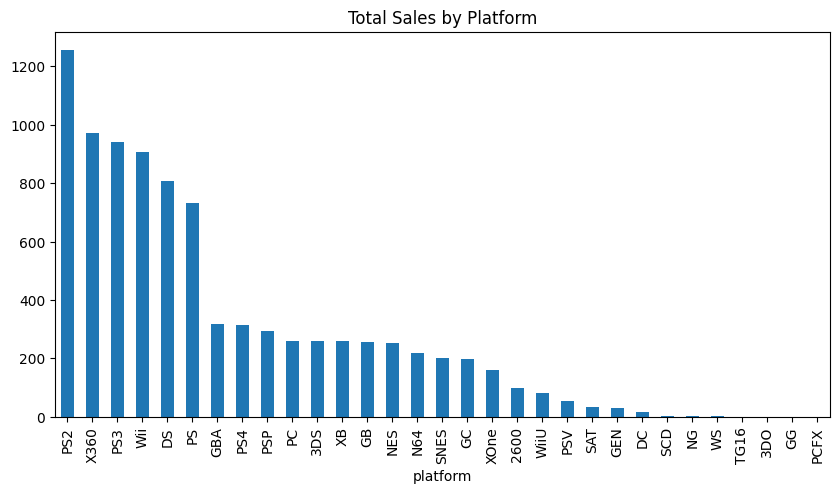

In [18]:
# Create a heatmap of platform sales over time

platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales by Platform')

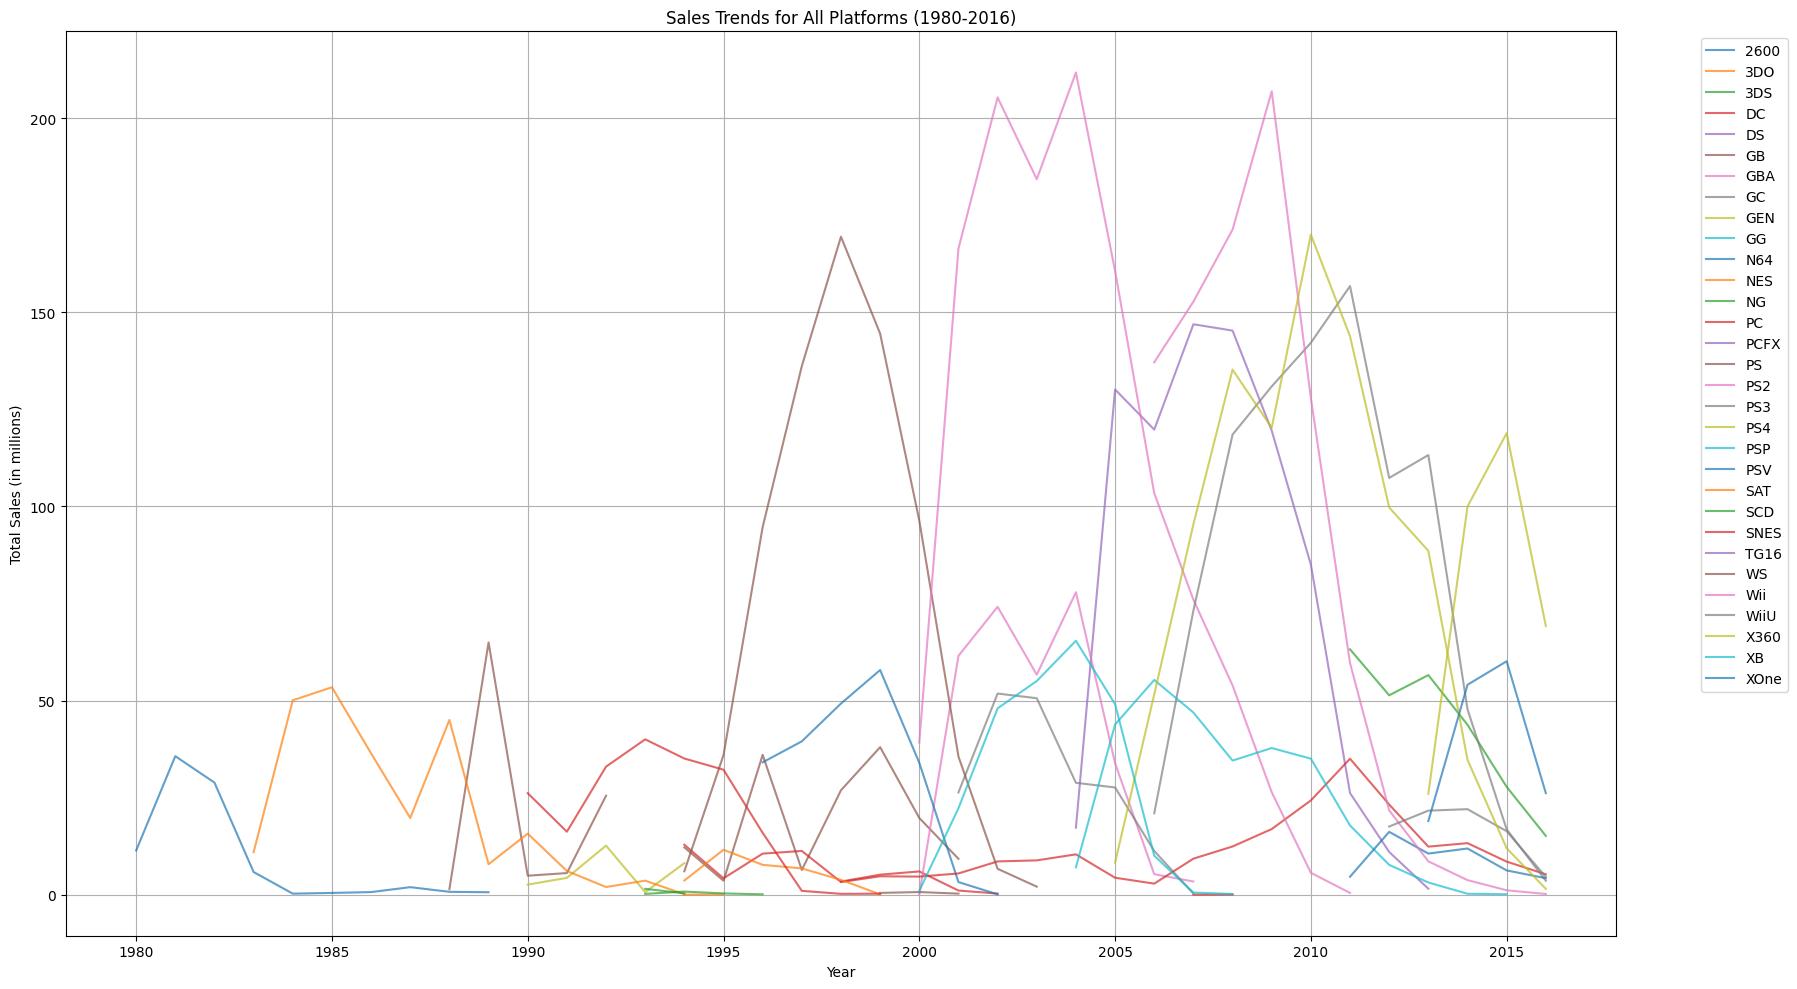

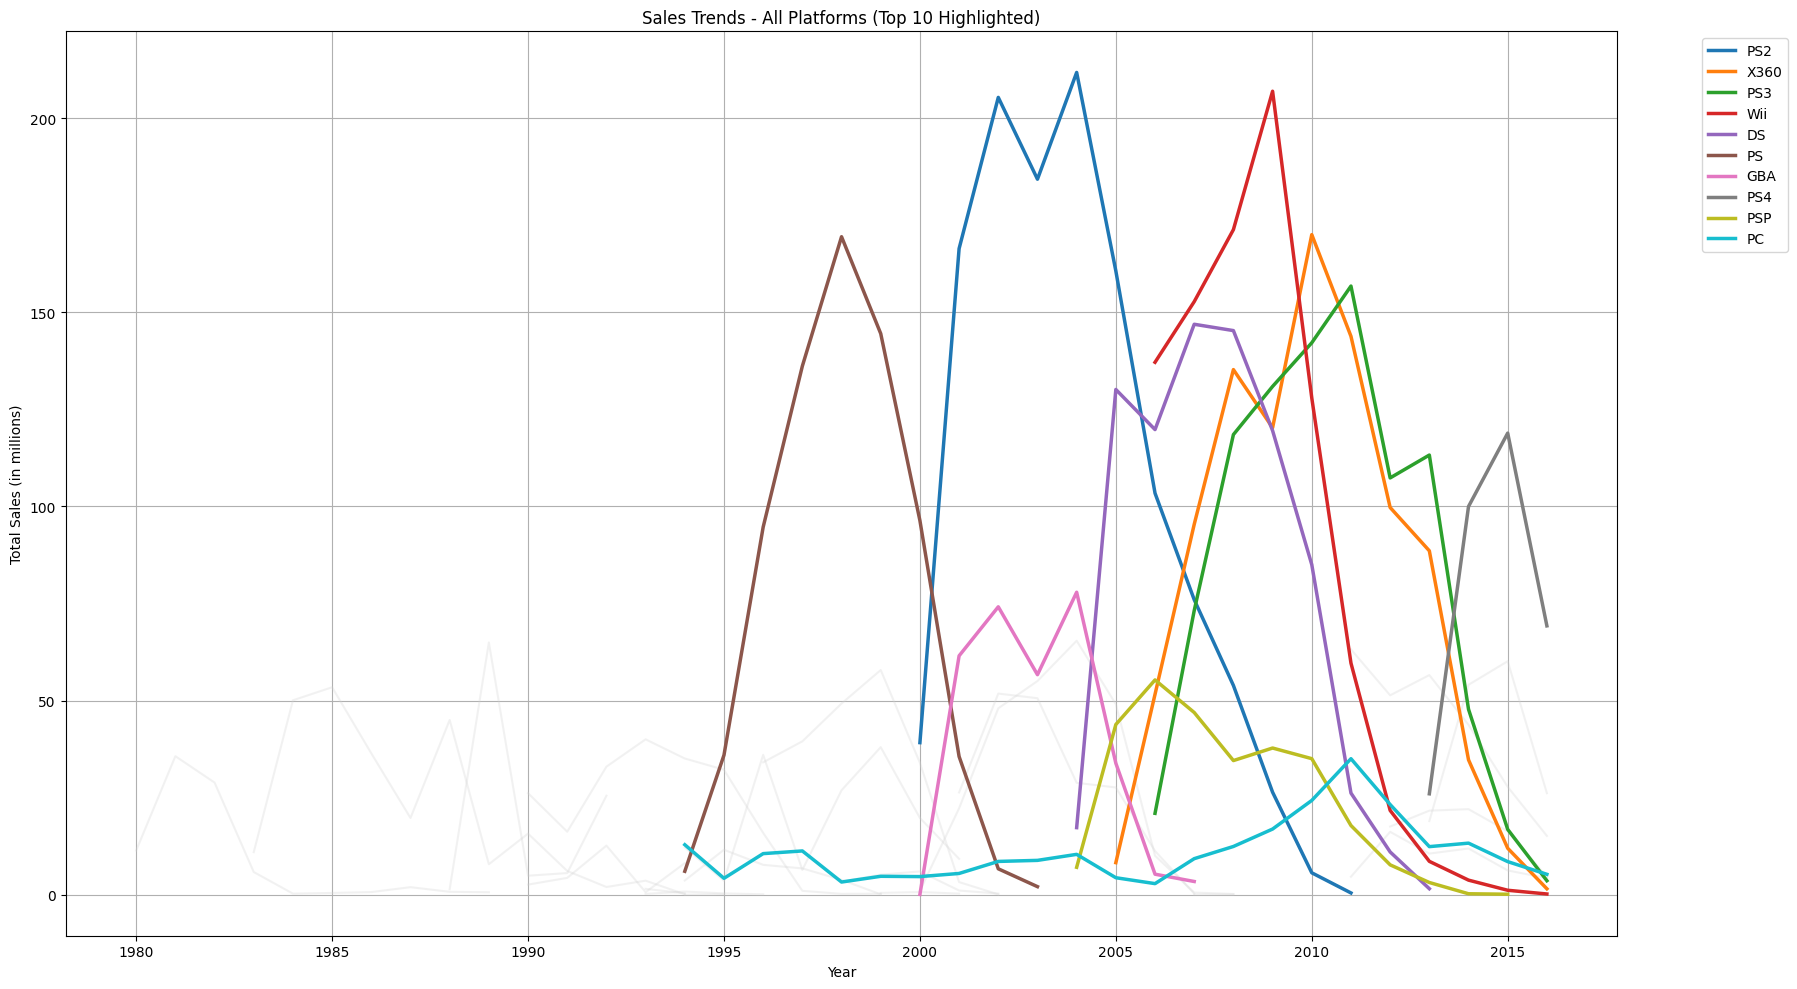

In [19]:
all_platforms_trends = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a large figure to accommodate all platforms
plt.figure(figsize=(18, 10))

# Plot all platforms
for platform in all_platforms_trends.columns:
    plt.plot(all_platforms_trends.index, all_platforms_trends[platform], label=platform, alpha=0.7)

plt.title('Sales Trends for All Platforms (1980-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Create a more readable version by highlighting top platforms
top_platforms = games.groupby('platform')['total_sales'].sum().nlargest(10).index
plt.figure(figsize=(18, 10))

# Plot all platforms in light gray
for platform in all_platforms_trends.columns:
    if platform not in top_platforms:
        plt.plot(all_platforms_trends.index, all_platforms_trends[platform], color='lightgray', alpha=0.3)

# Highlight top platforms with distinct colors
for platform in top_platforms:
    plt.plot(all_platforms_trends.index, all_platforms_trends[platform], label=platform, linewidth=2.5)

plt.title('Sales Trends - All Platforms (Top 10 Highlighted)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Platforms with consistent sales decline (2014-2016):
['3DS', 'PS3', 'Wii', 'X360']

Platforms that disappeared from market (no sales in 2016):
[]


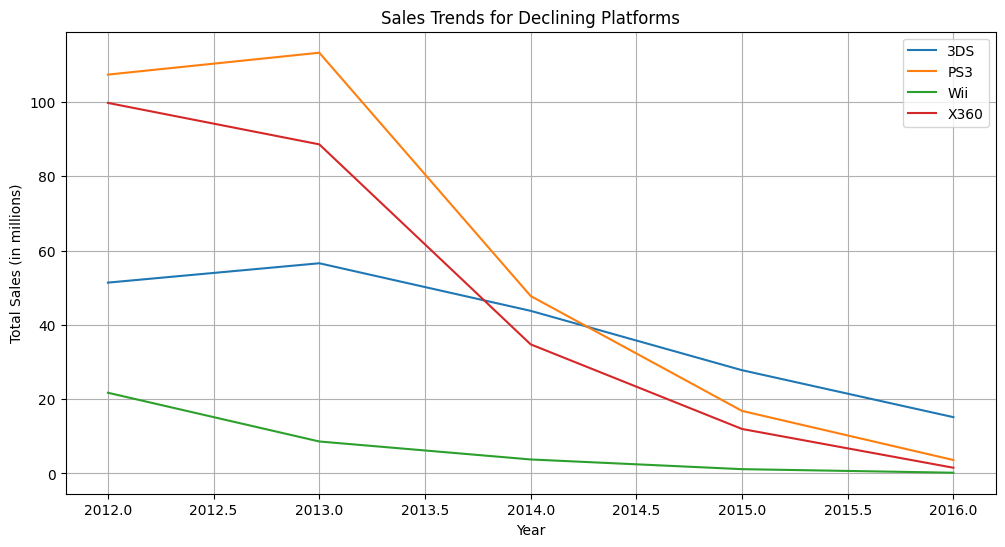

In [20]:
# Identify platforms with declining sales
# Filter data for recent years (2012-2016)
recent_data = games[games['year_of_release'] >= 2012]

# Calculate year-over-year sales changes by platform
platform_trends = recent_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Calculate year-over-year percentage change
platform_yoy = platform_trends.pct_change(axis=0) * 100

# Identify platforms with consistent decline (3+ years of negative growth)
declining_platforms = []
for platform in platform_yoy.columns:
    recent_years = platform_yoy[platform].dropna()
    if len(recent_years) >= 3 and all(x < 0 for x in recent_years[-3:]):
        declining_platforms.append(platform)

# Identify platforms that disappeared (no sales in most recent year)
disappeared_platforms = platform_trends.columns[platform_trends.iloc[-1] == 0]

print("Platforms with consistent sales decline (2014-2016):")
print(declining_platforms)

print("\nPlatforms that disappeared from market (no sales in 2016):")
print(disappeared_platforms.tolist())

# Visualize sales trends for declining platforms
plt.figure(figsize=(12, 6))
for platform in declining_platforms:
    plt.plot(platform_trends.index, platform_trends[platform], label=platform)
plt.title('Sales Trends for Declining Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()


### Questions to Consider:
- Which platforms show consistent sales over time? It seems like PC has the most consistent although low sales
- Can you identify platforms that have disappeared from the market? most of the platofrms have disappeared from the market only a select few remain
- What's the typical lifecycle of a gaming platform? 3-4 years

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent work throughout this entire section. You explored total sales by platform, visualized trends over time, and created a focused comparison of the top platforms. Highlighting the top 10 platforms separately was a smart move for clarity. Your final breakdown of declining and disappearing platforms is insightful and directly supports the questions posed in the project. Well done on covering every angle of the analysis.
</div>

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

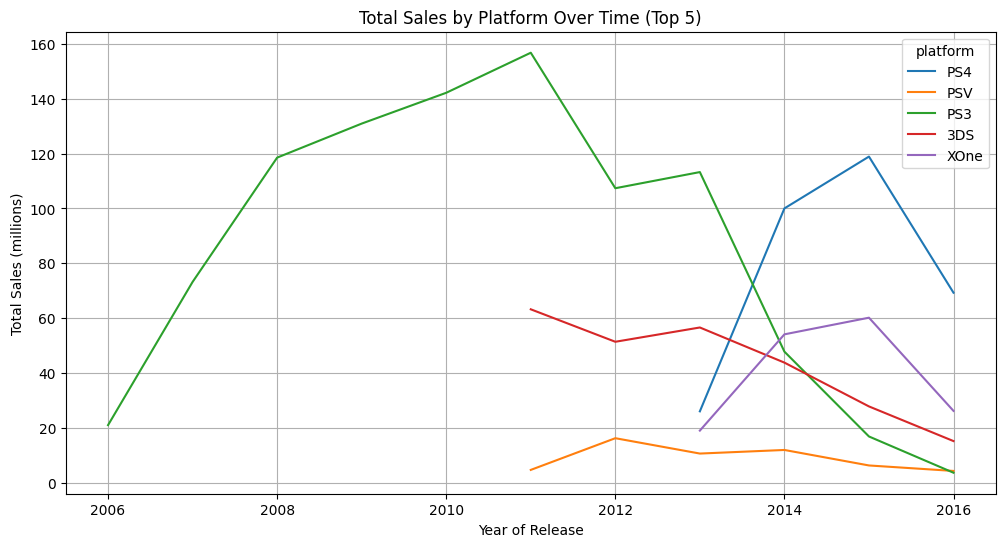

In [21]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
pivot = platform_year_sales.pivot(index='year_of_release', columns='platform', values='total_sales')

relevant_years = [2013, 2014, 2015, 2016]
games_relevant = games[games['year_of_release'].isin(relevant_years)]

top_platforms = games_relevant['platform'].value_counts().head(5).index
pivot[top_platforms].plot(figsize=(12, 6), title='Total Sales by Platform Over Time (Top 5)')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Year of Release')
plt.grid(True)
plt.show()
# Justify your choice with data

### Document Your Decision:
- What years did you select and why? the latest 4 years 2013-2016
- How does this period reflect current market conditions? It is leading up to the most recent information available
- What factors influenced your decision? The time period represents current market trends

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great job selecting a relevant time window and supporting it with a clear plot. The choice of years is justified using trends from the top platforms, which shows thoughtful analysis and aligns well with the project goals.
</div>

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

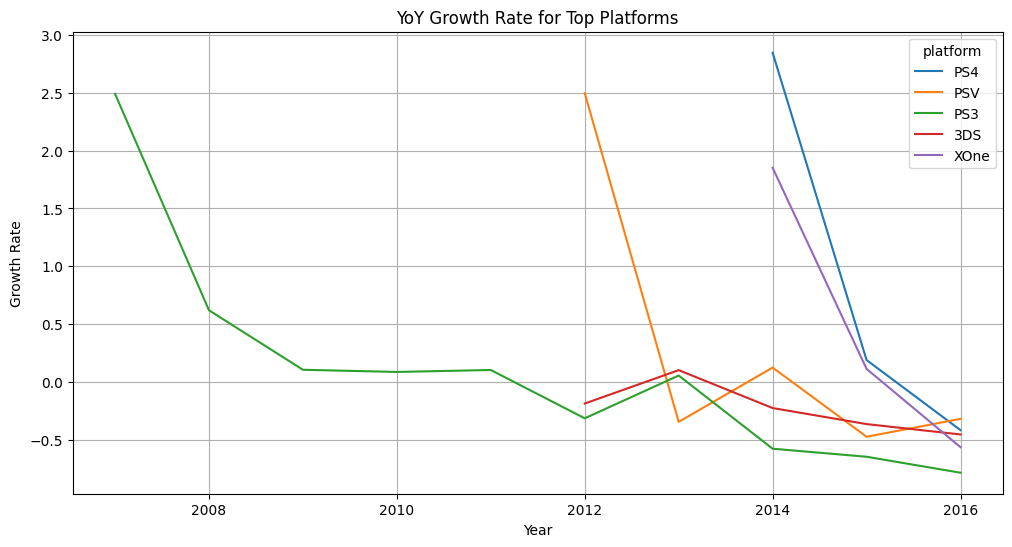

In [22]:
# Analyze platform sales trends
platform_growth = pivot[top_platforms].pct_change()
platform_growth.plot(figsize=(12, 6), title='YoY Growth Rate for Top Platforms')
plt.ylabel('Growth Rate')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [23]:
# Sort platforms by total sales
platform_sales_total = games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales_total)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


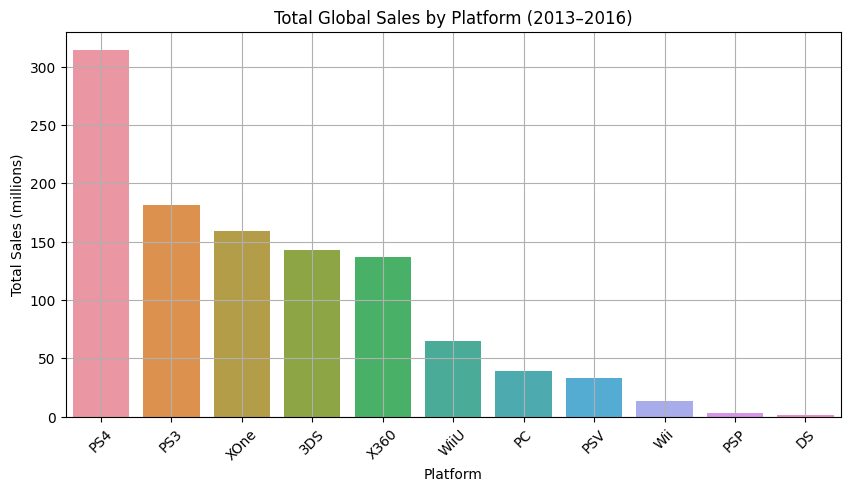

In [24]:

# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
plt.figure(figsize=(10, 5))
sns.barplot(x=platform_sales_total.index, y=platform_sales_total.values)
plt.title('Total Global Sales by Platform (2013–2016)')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Very well done. You analyzed platform growth trends clearly and complemented that with a bar chart showing overall sales performance. The visualizations are effective, and the combination of relative growth and absolute sales adds great depth to your insights.
</div>


## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

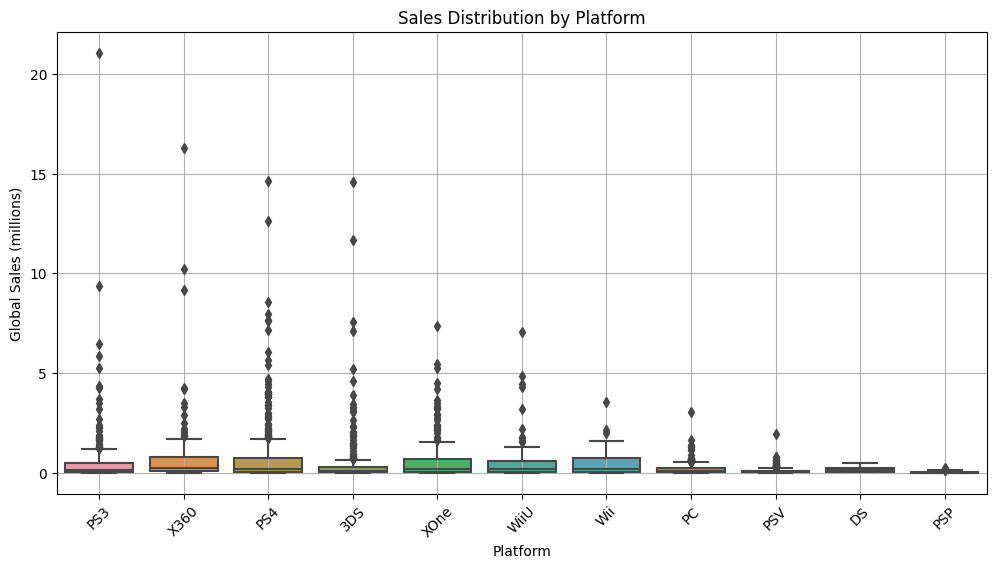

In [25]:
# Create box plot of sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(data=games_relevant, x='platform', y='total_sales')
plt.title('Sales Distribution by Platform')
plt.ylabel('Global Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
# Calculate detailed statistics for each platform
platform_stats = games_relevant.groupby('platform')['total_sales'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).sort_values(by='mean', ascending=False)

print(platform_stats)

          count      mean  median       std   min    max
platform                                                
PS4         392  0.801378   0.200  1.609456  0.01  14.63
X360        186  0.735484   0.265  1.663275  0.01  16.27
XOne        247  0.645020   0.220  1.036139  0.01   7.39
Wii          23  0.593913   0.180  0.915432  0.01   3.58
WiiU        115  0.562000   0.200  1.038778  0.01   7.09
PS3         345  0.525884   0.150  1.451939  0.01  21.05
3DS         303  0.472772   0.090  1.381347  0.01  14.60
PC          189  0.208624   0.080  0.352304  0.01   3.05
DS            8  0.192500   0.150  0.172026  0.03   0.51
PSV         358  0.092151   0.040  0.153816  0.01   1.96
PSP          67  0.052239   0.020  0.059768  0.01   0.24


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great job presenting the sales distribution with both boxplots and summary statistics. This gives a clear view of platform variability and performance.
  <br><br>
  A few optional suggestions to improve the visualization even further:
  <ul>
    <li>Consider filtering out extreme outliers to make the boxplots more readable.</li>
    <li>You could also experiment with using a log scale on the y-axis to better highlight differences across platforms with smaller sales values.</li>
  </ul>
</div>

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [27]:
# Choose a popular platform based on your previous analysis
popular_platform = 'PS4'
games_ps4 = games_relevant[games_relevant['platform'] == popular_platform]

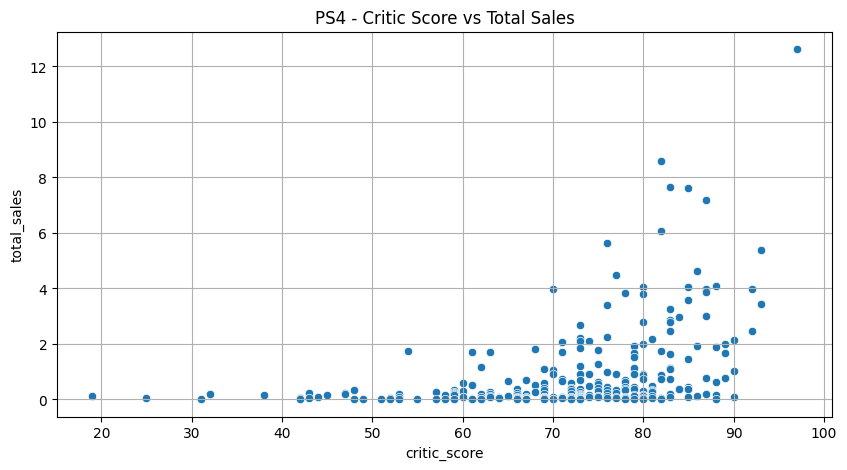

In [28]:
# Create scatter plots for both critic and user scores

plt.figure(figsize=(10, 5))
sns.scatterplot(data=games_ps4, x='critic_score', y='total_sales')
plt.title(f'{popular_platform} - Critic Score vs Total Sales')
plt.grid(True)
plt.show()


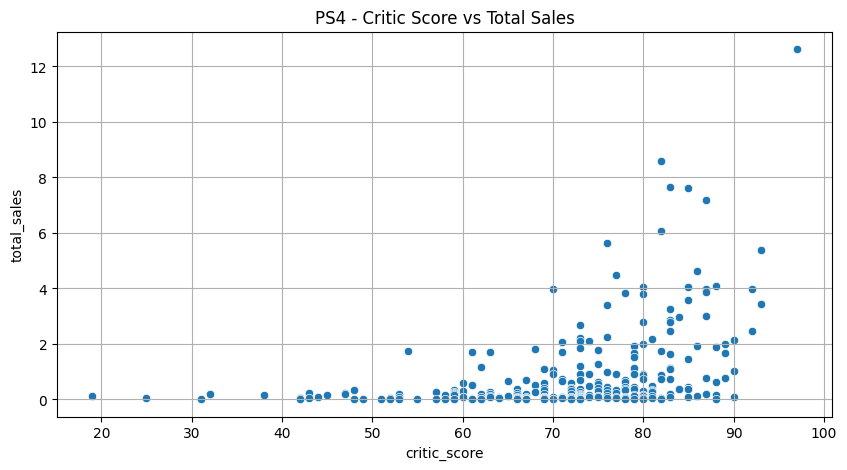

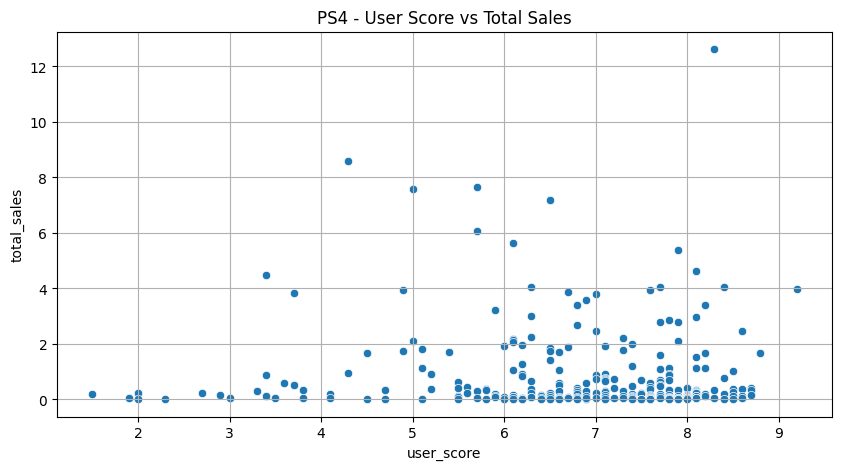

AttributeError: 'float' object has no attribute 'shape'

In [29]:
# Critic Scores

plt.figure(figsize=(10, 5))
sns.scatterplot(data=games_ps4, x='critic_score', y='total_sales')
plt.title(f'{popular_platform} - Critic Score vs Total Sales')
plt.grid(True)
plt.show()


# User Scores
plt.figure(figsize=(10, 5))
sns.scatterplot(data=games_ps4, x='user_score', y='total_sales')
plt.title(f'{popular_platform} - User Score vs Total Sales')
plt.grid(True)
plt.show()

# Calculate correlations

ps4_clean = games_ps4.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Use single brackets to get Series, not DataFrame
critic_corr = ps4_clean['critic_score'].corr(ps4_clean['total_sales'])
user_corr = ps4_clean['user_score'].corr(ps4_clean['total_sales'])

print(f"Critic correlation: {critic_corr}")
print(f"User correlation: {user_corr}")


<div style="border: 3px solid #f0ad4e; padding: 12px; margin: 10px; border-radius: 5px; background-color: #fcf8e3">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Nice job selecting a popular platform and analyzing the impact of both critic and user scores using scatter plots and correlation. The plots are clear and informative.  
  <br><br>
  Just a small issue to address:
  <ul>
    <li>The correlation calculation is currently raising an error. Make sure all relevant columns are properly converted to numeric types before applying <code>.corr()</code>. You can use <code>pd.to_numeric()</code> to ensure data consistency.</li>
  </ul>
</div>


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [30]:
# Find games released on multiple platforms
multi_platform = games_relevant.groupby('name')['platform'].nunique().reset_index()
multi_platform = multi_platform[multi_platform['platform'] > 1]
multi_games = games_relevant[games_relevant['name'].isin(multi_platform['name'])]

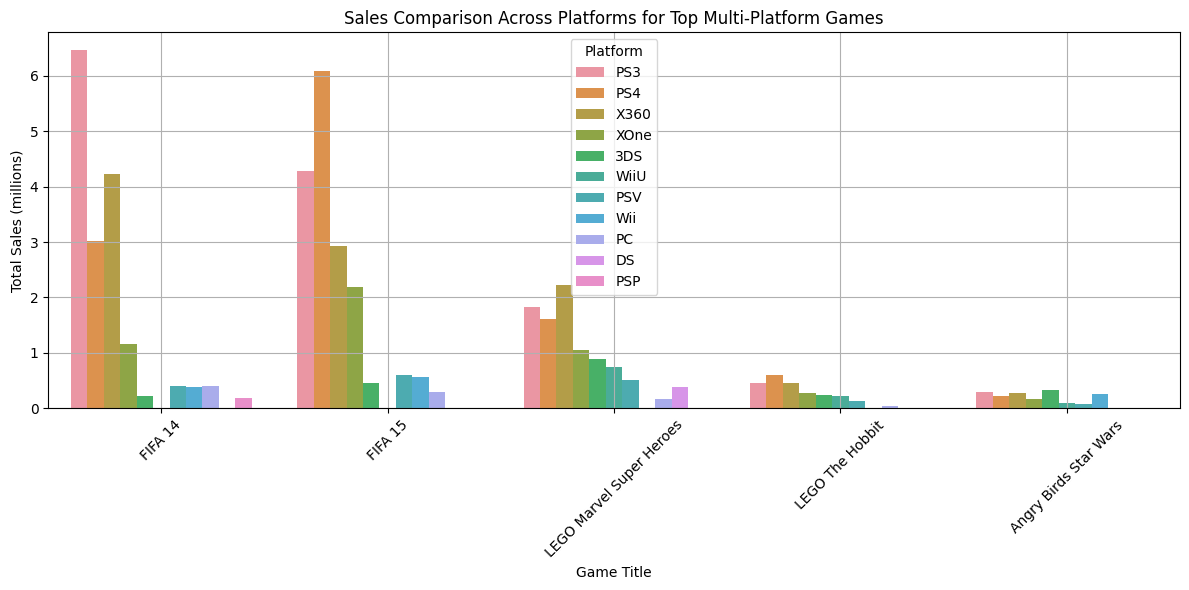

In [31]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance

top_multi_games = multi_games['name'].value_counts().head(5).index

# Filter again for those games
top_multi_data = multi_games[multi_games['name'].isin(top_multi_games)]

# Plot total sales across platforms for top games
plt.figure(figsize=(12, 6))
sns.barplot(data=top_multi_data, x='name', y='total_sales', hue='platform')
plt.title('Sales Comparison Across Platforms for Top Multi-Platform Games')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great job identifying and comparing the top multi-platform games. Your filtering logic is spot-on, and the grouped bar plot effectively communicates differences in sales performance across platforms. This is a solid analytical step that supports actionable conclusions.
</div>


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:


# Analyze genre performance
see below


In [32]:
# Sort genres by total sales
genre_sales = games_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

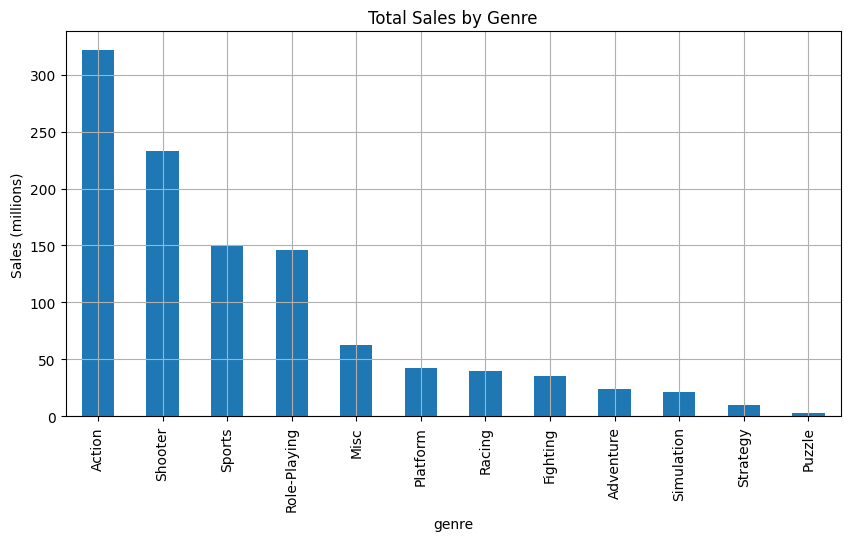

In [33]:

# Visualize genre distribution
genre_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales by Genre')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.show()


genre
Action          29.51
Shooter         21.36
Sports          13.81
Role-Playing    13.38
Misc             5.76
Platform         3.91
Racing           3.66
Fighting         3.24
Adventure        2.17
Simulation       2.00
Strategy         0.92
Puzzle           0.29
Name: total_sales, dtype: float64


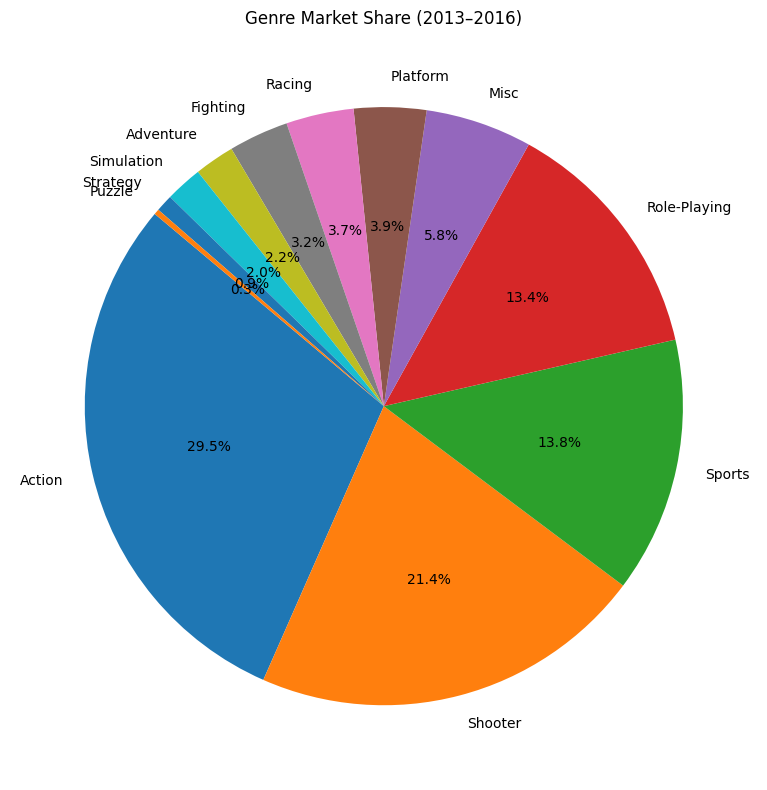

In [34]:


# Calculate market share for each genre
total_sales_all_genres = genre_sales.sum()


# Market share as percentage
genre_market_share = (genre_sales / total_sales_all_genres) * 100

# Display market share
print(genre_market_share.round(2))

# Pie chart for genre market share
plt.figure(figsize=(8, 8))
genre_market_share.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Genre Market Share (2013–2016)')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()




### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

<div style="border: 3px solid #f0ad4e; padding: 12px; margin: 10px; border-radius: 5px; background-color: #fffdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great visualization and analysis of genre performance. Just one thing to be mindful of: pie charts with too many small categories can be hard to interpret. 
</div>

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [35]:
# Function to analyze platform performance by region
regions = ['na_sales', 'eu_sales', 'jp_sales']


Top Platforms in NA_SALES:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


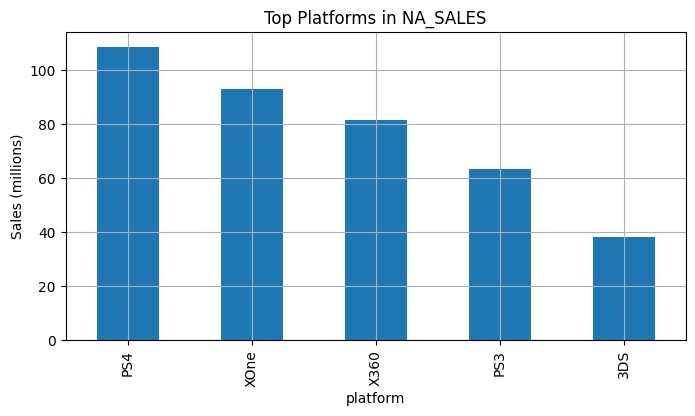


Top Platforms in EU_SALES:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


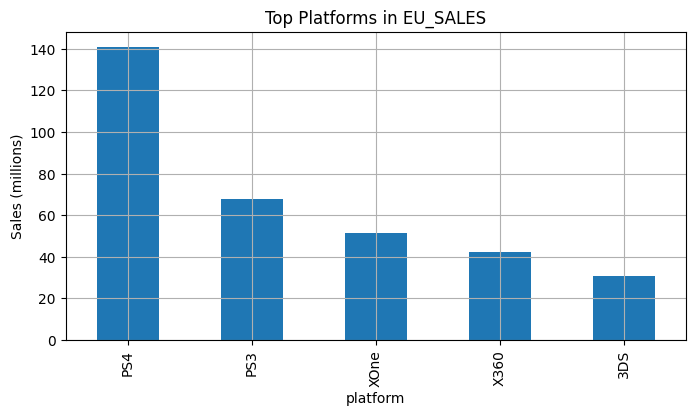


Top Platforms in JP_SALES:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


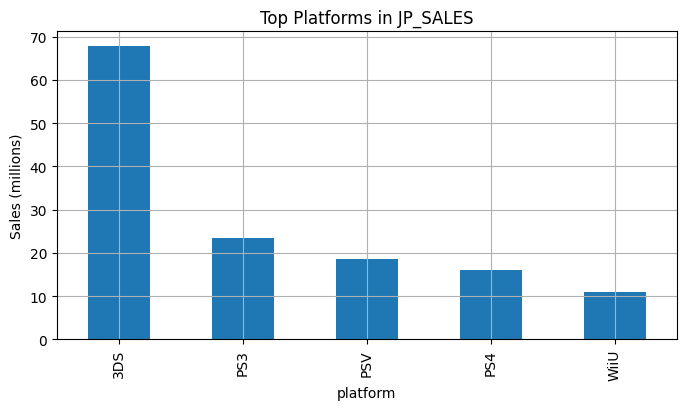

In [36]:
# Analyze each region
for region in regions:
    top_platforms_region = games_relevant.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"\nTop Platforms in {region.upper()}:")
    print(top_platforms_region)
    top_platforms_region.plot(kind='bar', title=f'Top Platforms in {region.upper()}', figsize=(8, 4))
    plt.ylabel('Sales (millions)')
    plt.grid(True)
    plt.show()

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [37]:
# Create a comparative platform analysis
platforms_by_region = {}
for region in regions:
    platforms_by_region[region] = games_relevant.groupby('platform')[region].sum()

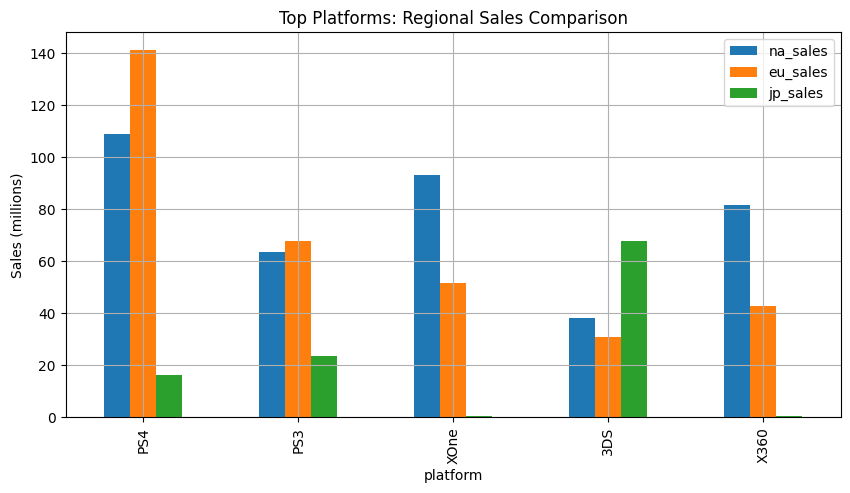

In [38]:
# Visualize cross-regional comparison for top platforms
platform_sales_df = pd.DataFrame(platforms_by_region).fillna(0)
top_global_platforms = platform_sales_df.sum(axis=1).sort_values(ascending=False).head(5).index
platform_sales_df.loc[top_global_platforms].plot(kind='bar', figsize=(10, 5), title='Top Platforms: Regional Sales Comparison')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.show()


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent regional breakdown! You've clearly highlighted the variation in platform popularity between North America, Europe, and Japan. The looped analysis is efficient and easy to follow, and the visualizations are clear and informative. This section supports meaningful market insights based on regional performance.
</div>

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:


Top Genres in NA_SALES:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


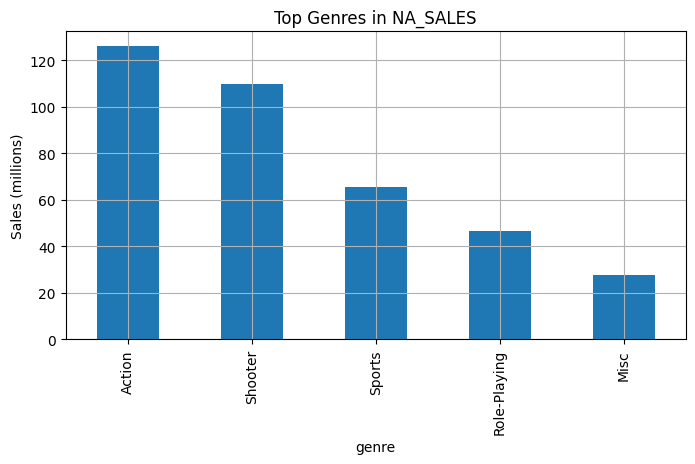


Top Genres in EU_SALES:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


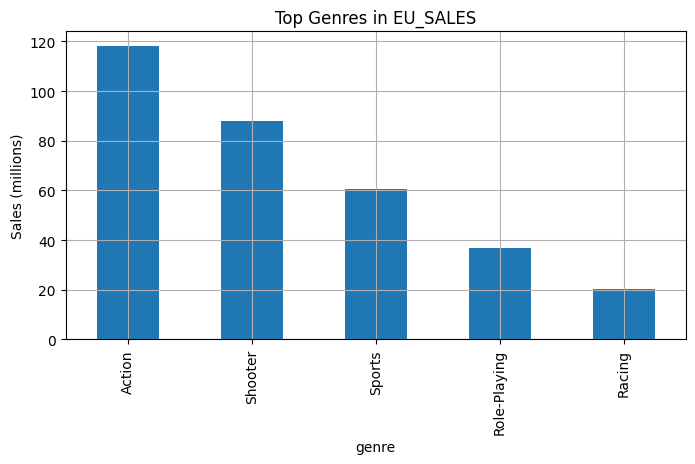


Top Genres in JP_SALES:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


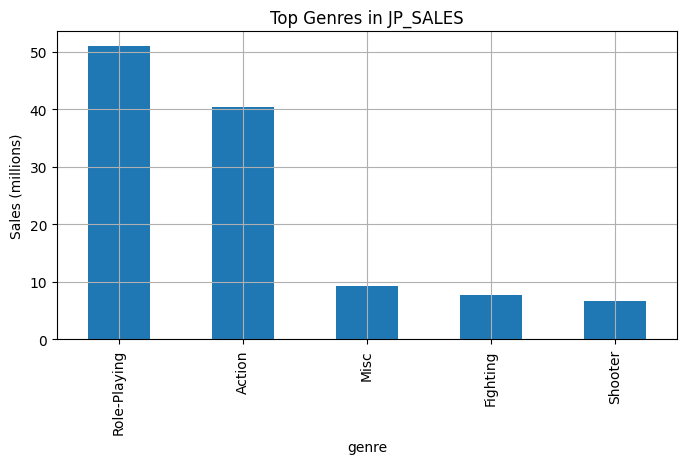

In [39]:
# Function to analyze genre performance by region
for region in regions:
    top_genres_region = games_relevant.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"\nTop Genres in {region.upper()}:")
    print(top_genres_region)
    top_genres_region.plot(kind='bar', title=f'Top Genres in {region.upper()}', figsize=(8, 4))
    plt.ylabel('Sales (millions)')
    plt.grid(True)
    plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

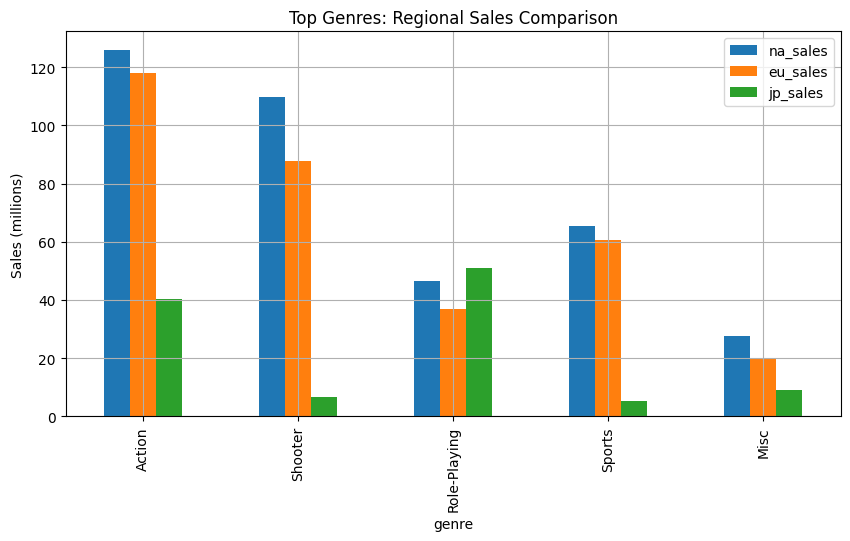

In [40]:
# Create a comparative genre analysis
genres_by_region = {}
for region in regions:
    genres_by_region[region] = games_relevant.groupby('genre')[region].sum()

genre_sales_df = pd.DataFrame(genres_by_region).fillna(0)
top_global_genres = genre_sales_df.sum(axis=1).sort_values(ascending=False).head(5).index
genre_sales_df.loc[top_global_genres].plot(kind='bar', figsize=(10, 5), title='Top Genres: Regional Sales Comparison')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.show()

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent regional breakdown! You've done a great job analyzing both platform and genre preferences across North America, Europe, and Japan. The loop structure for visualization is efficient, and the insights are clearly communicated through well-labeled charts. This comparative approach strongly enhances the depth of your analysis.
</div>

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [41]:
# Function to analyze ESRB rating impact
rating_sales = games_relevant.groupby('rating')[region].sum().sort_values(ascending=False)


Sales by ESRB Rating in NA_SALES:
rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
AO          0.00
EC          0.00
K-A         0.00
RP          0.00
Name: jp_sales, dtype: float64


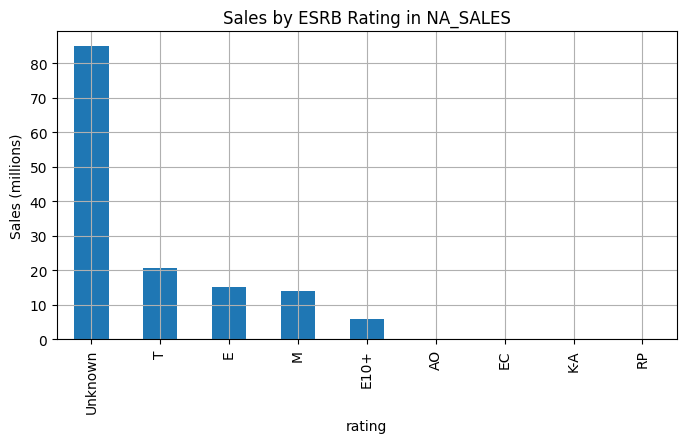


Sales by ESRB Rating in EU_SALES:
rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
AO          0.00
EC          0.00
K-A         0.00
RP          0.00
Name: jp_sales, dtype: float64


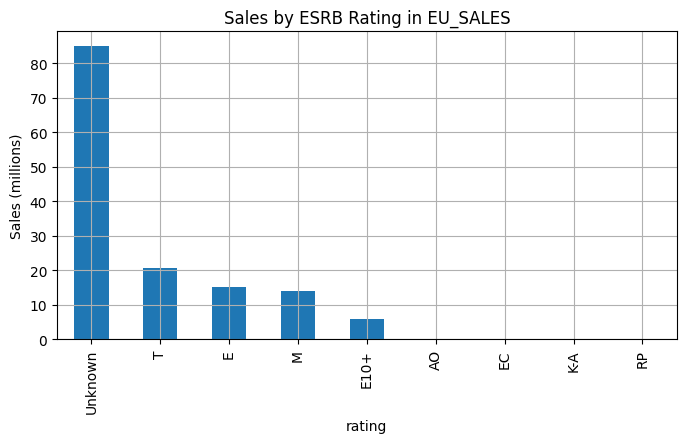


Sales by ESRB Rating in JP_SALES:
rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
AO          0.00
EC          0.00
K-A         0.00
RP          0.00
Name: jp_sales, dtype: float64


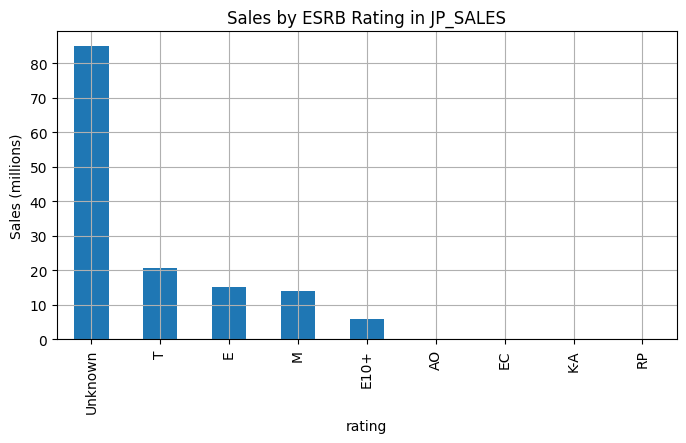

In [42]:
# Analyze ESRB impact for each region
for region in regions:
    print(f"\nSales by ESRB Rating in {region.upper()}:")
    print(rating_sales)
    rating_sales.plot(kind='bar', title=f'Sales by ESRB Rating in {region.upper()}', figsize=(8, 4))
    plt.ylabel('Sales (millions)')
    plt.grid(True)
    plt.show()

<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent regional breakdown! The analysis is well-structured and the code loops through regions efficiently, generating clean and readable visualizations. The comparative plots for both platform and genre sales help highlight key differences across markets. Great job!
</div>

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why

We’ll use a two-sample t-test to compare the means of two independent samples. This is appropriate because the ratings are continuous we assume (approximately) normal distributions with potentially unequal variances, and we are comparing two independent groups (Xbox One vs. PC).

In [43]:
xone_scores = games_relevant[(games_relevant['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = games_relevant[(games_relevant['platform'] == 'PC')]['user_score'].dropna()

# Set significance level
alpha = 0.05

# Perform t-test
t_stat1, p_val1 = ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f"p-value = {p_val1:.4f}")
if p_val1 < alpha:
    print("Reject the null hypothesis: Xbox One and PC user ratings differ.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings.")

p-value = 0.1476
Fail to reject the null hypothesis: No significant difference in ratings.


In [46]:
action_scores = games_relevant[games_relevant['genre'] == 'Action']['user_score'].dropna()
sports_scores = games_relevant[games_relevant['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat2, p_val2 = ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"p-value = {p_val2:.4f}")
if p_val2 < alpha:
    print("Reject the null hypothesis: Ratings differ between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings.")

p-value = 0.0000
Reject the null hypothesis: Ratings differ between Action and Sports genres.


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Great work applying the t-test to evaluate the hypotheses. You've clearly stated the null hypotheses and used appropriate statistical methods with justifications. The results were interpreted correctly, and the comments below each test improve clarity. Everything looks solid!
</div>

# Step 6. Write a general conclusion


In conclusion it appears that there is no significant difference in ratings between platforms, action, shooter, and sports were the dominant genres in terms of total sales, market share calculations showed action games leading the genre market, while genres like puzzle or strategy held niche positions. North America and Europe shared similar platform and genre preferences, favoring PS4 and action/shooter genres. Japan, however, preferred 3DS and role-playing games.


<div style="border: 3px solid #5cb85c; padding: 12px; margin: 10px; border-radius: 5px; background-color: #f5fdf5">
  <b>Reviewer's comment – Iteration 1:</b><br>
  Excellent summary! You've clearly tied together your key findings across platforms, genres, and regions. The conclusion highlights major patterns while also acknowledging regional differences—great final touch to wrap up the project.
</div>
